# Classification task
- excersize based on MNIST on digital character recognition

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
X , y = mnist["data"], mnist["target"]

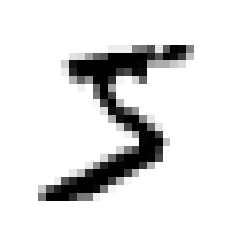

In [60]:
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [33]:
y = y.astype(np.uint8)

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### First test binary training of 5

In [36]:
y_train_5 = (y_train == 5)
y_test5 = (y_test == 5)

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [69]:
sgd_clf.predict(X[1:2])

array([False])

In [80]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [74]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [85]:
np.sum(confusion_matrix(y_train_5,y_train_pred))

60000